## Section 1: Preliminaries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau

import cv2

from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.metrics import accuracy_score

## Section 2: Data

#### Section 2.0: Wisconsin Breast Cancer (WDBC) Dataset

##### Section 2.0.1: Loading + Cleaning

In [ ]:
# Loading the Wisconsin Breast Cancer (WDBC) Dataset
WDBC_dataset = pd.read_csv("/Users/mark/Desktop/COMP 451/Final Project/Datasets/data.csv")
WDBC_dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# Cleaning the dataset

# Removing unnescessary columns
WDBC_dataset = WDBC_dataset.drop(["Unnamed: 32", "id"], axis=1) # Removes the columns 'Unnamed: 32' (which includes only NA's) and 'id' (which includes irrelavant integers)
WDBC_dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# Creating features and labels
X = WDBC_dataset.iloc[:, 1:]
y = WDBC_dataset.iloc[:, 0]

print("Shape of features: ", X.shape)
print("Shape of labels: ", y.shape)

Shape of features:  (569, 30)
Shape of labels:  (569,)


##### Section 2.0.2: Data Analysis

Count plot for the class (label) distribution:

Number of Benign:  357
Number of Malignant:  212


/var/folders/x9/dr5nnxp55fv46zrz3bq1wgc00000gn/T/ipykernel_68060/2038237722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  label_counts_plot = sns.countplot(x = "diagnosis", palette="Blues", data=WDBC_dataset)


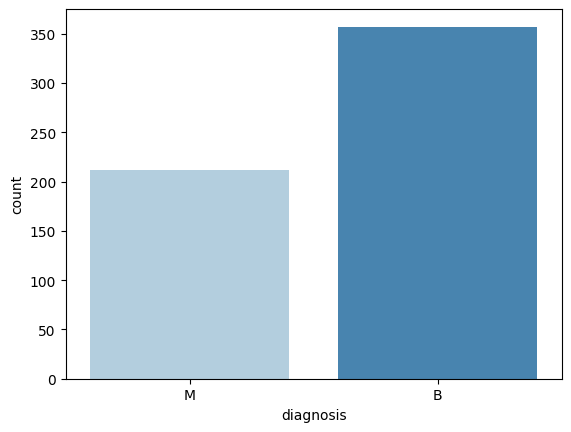

In [ ]:
# Plot the count of class labels (of WDBC dataset)
label_counts_plot = sns.countplot(x = "diagnosis", palette="Blues", data=WDBC_dataset)
B, M = WDBC_dataset["diagnosis"].value_counts()
print("Number of Benign: ", B)
print("Number of Malignant: ", M)

Histogram for each feature (per class label) in WDBC dataset:

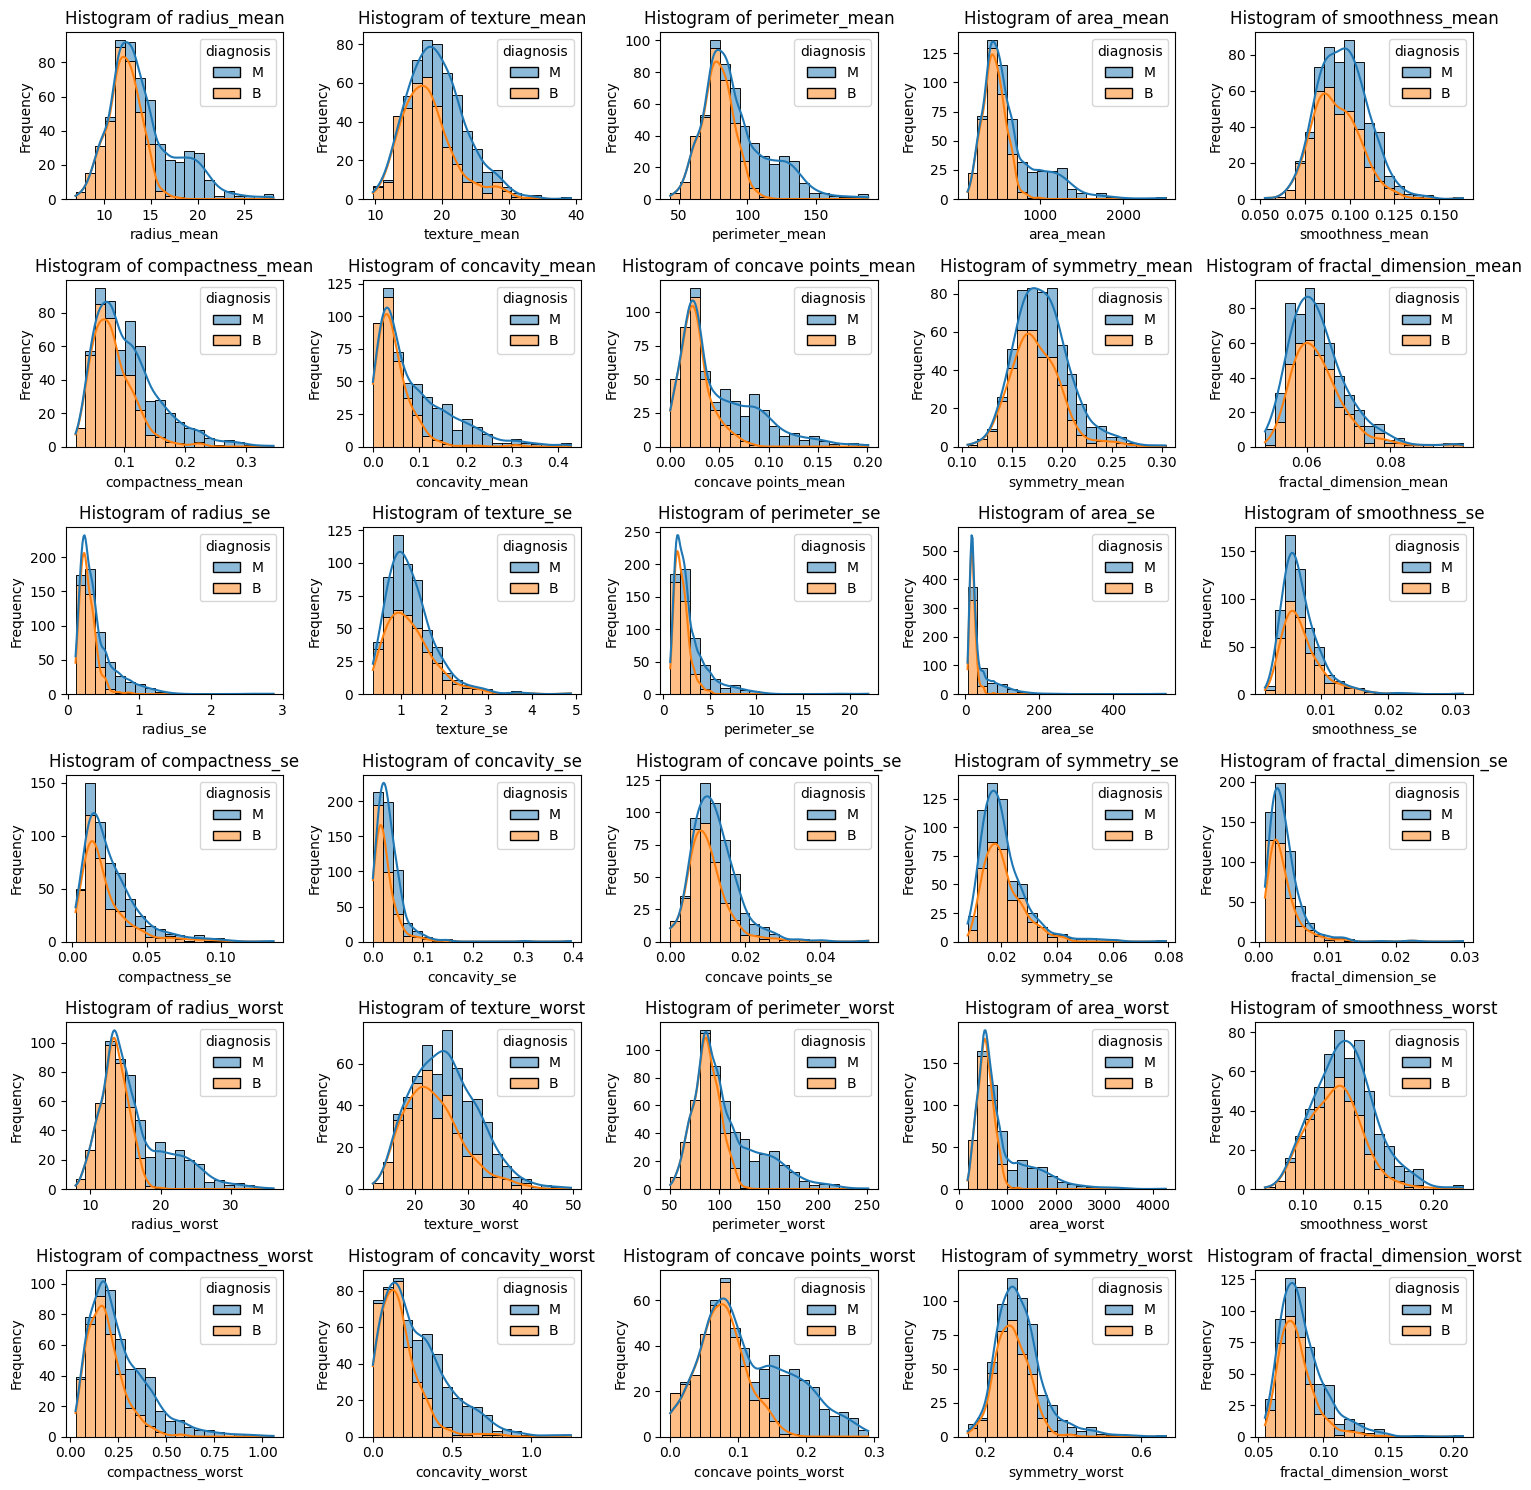

In [ ]:
# Plots histogram for each feature (per class label) in WDBC dataset

# List of features to plot
features = WDBC_dataset.columns[1:]  # Excluding 'diagnosis' column

# Set up the figure
plt.figure(figsize=(15, 15))

# Loop through each feature and plot histograms
for i, feature in enumerate(features, 1):
    plt.subplot(6, 5, i)  # Adjust the number of rows and columns as needed
    sns.histplot(data=WDBC_dataset, x=feature, hue='diagnosis', multiple="stack", kde=True, bins=20)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In order to see correlation between the features in the WDBC dataset we will visualize a correlation matrix, where each entry of the matrix corresponds to the pairwise correlation between two features. We will visualize the correlation matrix through a heatmap:

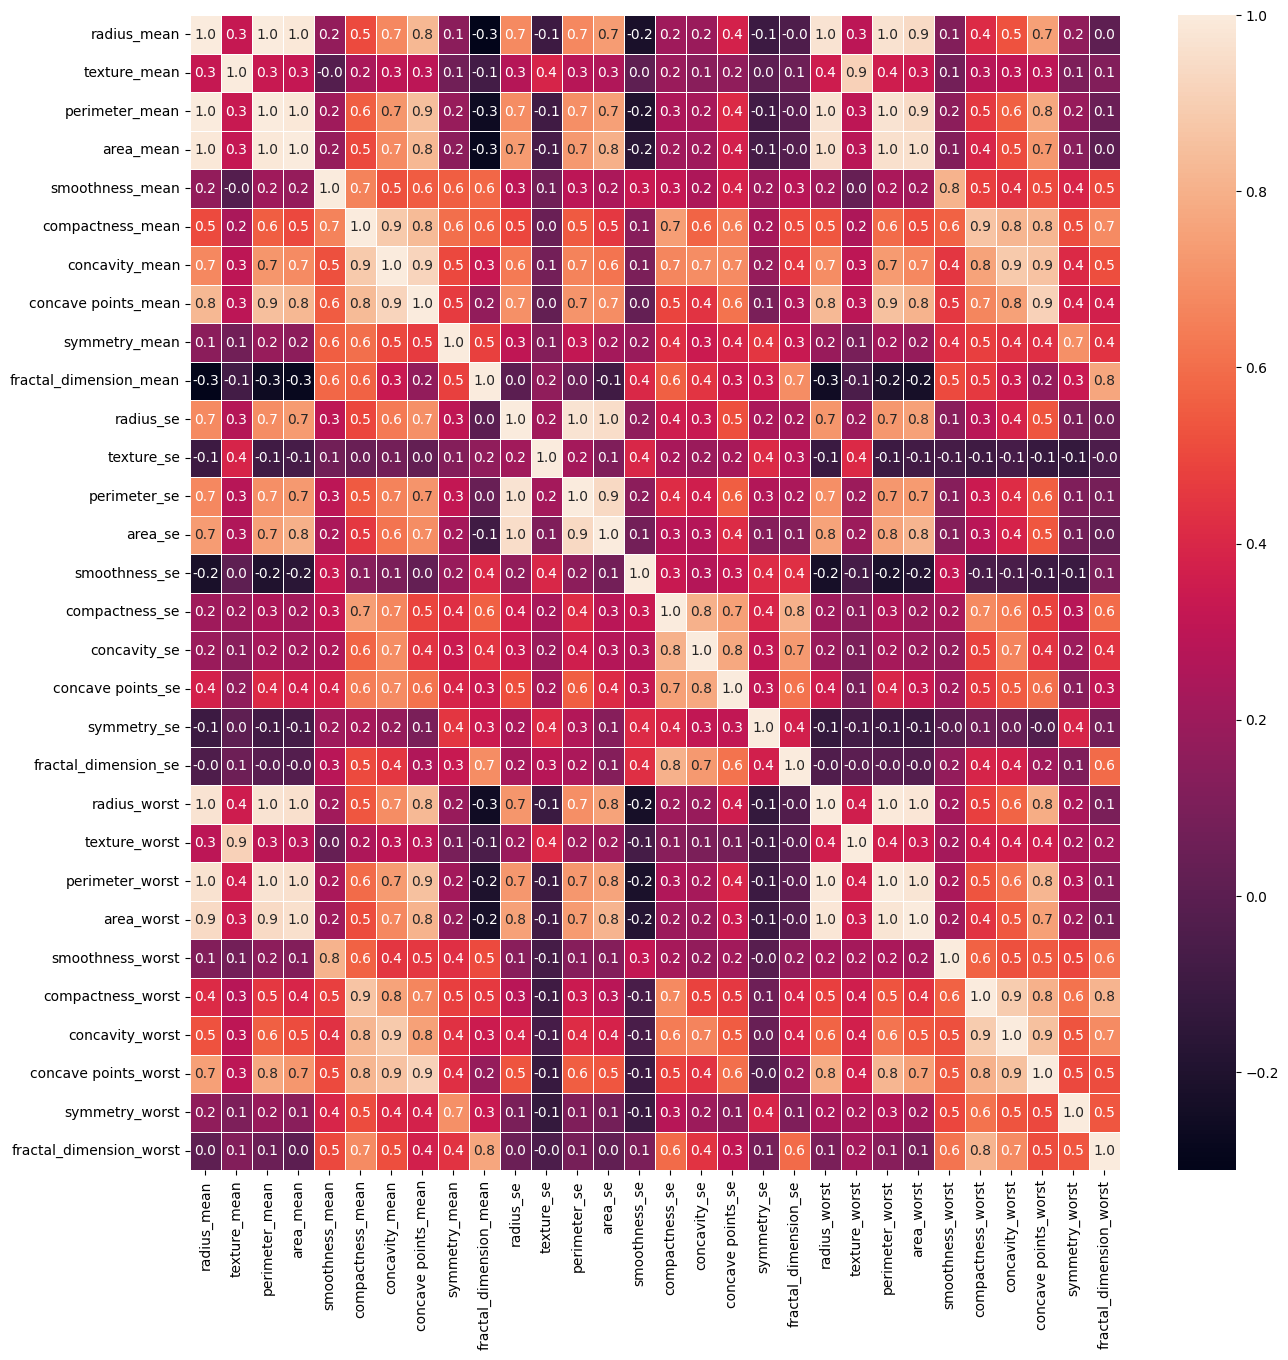

In [ ]:
# Creates correlation matrix
X_correlation_matrix = X.corr()

# Plots heatmap
fig,axes = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(X_correlation_matrix, annot=True, linewidths=.5, fmt= '.1f',ax=axes)

#### Section 2.1: Principal Component Analysis (PCA)

In [ ]:
class myPCA:

    def __init__(self, num_of_components):
        """
        Initialize the PCA class.

        Parameters:
        - n_components (int): Number of principal components to keep (default value is 1).
        """

        self.num_of_components = num_of_components


    def fit(self, X):
        """
        Fit the PCA model on the dataset X.

        Parameters:
        - X (ndarray): Input data matrix of shape (n_samples, n_features).
        """

        # Step 1: Standardize the features (mean 0 and variance 1)
        X_center = X - X.mean(axis=0) # centers the data
        X_standardized = X_center / X.std(axis=0)

        # Step 2: Perform Singular Value Decomposition (SVD) on feature matrix
        self.U, self.Sigma, self.Vt = np.linalg.svd(X_standardized)

        # Step 3: Obtain principal components
        self.components = self.Vt[ : self.num_of_components] # selects first 'num_of_components' rows of Vt (corresponds to the first 'num_of_components' principal components)

        # Step 4: Obtain eigenvalues (amount of variance captured by each principal component)
        self.eigenvalues = self.Sigma ** 2 / (X.shape[0] - 1)

        return


    def transform(self, X):
        """
        Project the data matrix X onto the principal components.

        Parameters:
        - X (ndarray): Input data matrix of shape (n_samples, n_features).

        Returns:
        - Transformed data of shape (n_samples, n_components).
        """

        # Standardize features (mean 0 and variance 1)
        X_center = X - X.mean(axis=0) # centers the data
        X_standardized = X_center / X.std(axis=0)

        # Project the data (feature matrix) on the principal components
        X_proj = X_standardized @ self.components.T

        return X_proj


    def get_explained_variance_ratio(self):

        # Compute ratio of explained variance of each principal component and total variance
        explained_variance_ratio = self.eigenvalues[ : self.num_of_components] / self.eigenvalues.sum()

        return explained_variance_ratio


    def plot_proportion_of_total_variance_explained(self):

        # Compute ratio of explained variance of each principal component and total variance
        self.explained_variance_ratio = self.get_explained_variance_ratio()

        # Generate labels for x-axis
        self.principal_components_labels = [f"PC {i + 1}" for i in range(self.num_of_components)]

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(self.principal_components_labels, self.explained_variance_ratio, marker='o', linestyle='-', color='navy')
        plt.xticks(rotation=45, fontsize=10) # Rotate labels 45° and reduce font size
        plt.title("Proportion of Total Variance Explained (Standardized)", fontsize=14)
        plt.xlabel("Principal Components")
        plt.ylabel("Percentage of (Total) Variance Explained")
        plt.ylim(0, 1)
        plt.show()

        return


    def plot_total_variance_explained(self, var_percentage):

        # Compute the (total) amount of variance explained
        explained_variance_total = np.cumsum(self.get_explained_variance_ratio()) # this is a vector where component i represents the amount of variance that the first i principal components explain

        # Determine the number of principal components needed to explain 'var_percentage'% of the variance in the data
        L = np.argmax(explained_variance_total >= var_percentage) + 1 # determines the (first) index of component where its value is larger than or equal to 'var_percentage'

        # Generate labels for x-axis
        principal_components_labels = [f"{i + 1} PC" for i in range(self.num_of_components)]

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(principal_components_labels, explained_variance_total, marker='o', linestyle='-', color='navy')
        plt.axhline(y=var_percentage, color='g', linestyle='--', label=f"{var_percentage}% Variance Explained") # Adds horizontal line at y=var_percentage for visualization purposes
        plt.xticks(rotation=45, fontsize=10)  # Rotate labels 45° and reduce font size
        plt.title("Cumulative Variance Explained by Principal Components")
        plt.xlabel("Number of Principal Components")
        plt.ylabel("Percentage of (Total) Variance Explained")
        plt.legend()
        plt.show()

        # Print number of principal components needed to explain threshold variance percentage
        print(f'{var_percentage * 100}% of the variance is explained using {L} principal components')

        return


    def plot_loadings(self):

        # Calculate loadings
        self.loadings = self.components * np.sqrt(self.eigenvalues)

        # Dynamically adjust figure size
        num_components, num_features = self.loadings.shape
        fig_width = min(20, max(10, num_features / 2))  # Limit size for very large matrices
        fig_height = min(20, max(10, num_components / 2))

        plt.figure(figsize=(fig_width, fig_height))


        # Plot the heatmap
        plt.matshow(self.loadings, cmap="coolwarm", fignum=False)
        plt.title("Factor Loadings (Standardized)", fontsize=16, pad=20)

        # Configure ticks
        plt.xticks(range(num_features), [f"Feature {i+1}" for i in range(num_features)], rotation=90, fontsize=10)
        plt.yticks(range(num_components), [f"PC {i+1}" for i in range(num_components)], fontsize=10)
        plt.tick_params(axis='both', length=0.5, direction='out')

        # Annotate the heatmap (conditionally)
        if True:
            for (i, j), z in np.ndenumerate(self.loadings):
                plt.text(j, i, f"{z:.2f}", ha='center', va='center', fontsize=6, color="black")

        # Add color bar for magnitude
        plt.colorbar(label="Loading Magnitude", shrink=0.8, aspect=10)

        plt.tight_layout()
        plt.show()

        return

In [ ]:
# Create PCA model
pca = myPCA(num_of_components=10)
pca.fit(X)

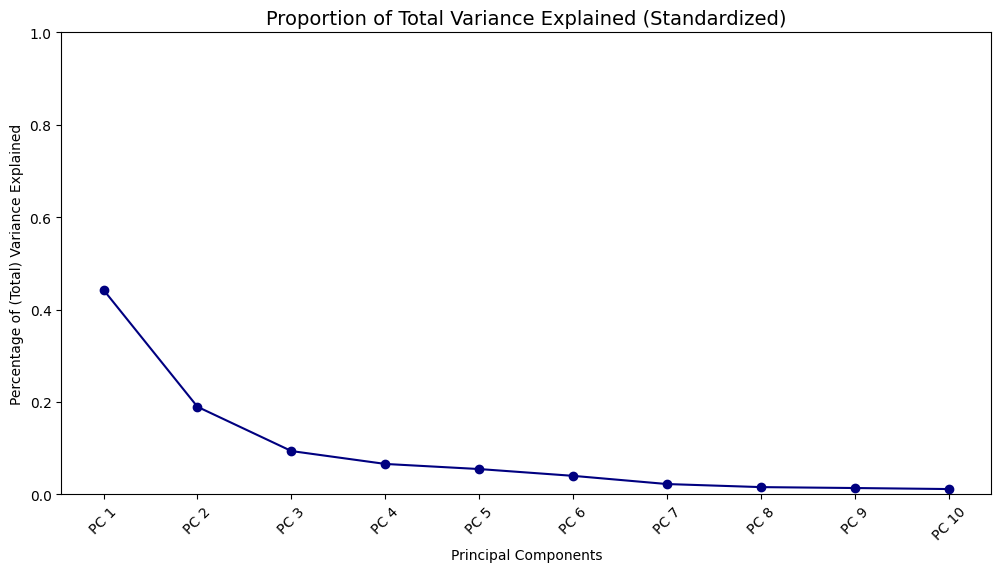

In [ ]:
# Plot proportion of cumulative variance explained by each principal component
pca.plot_proportion_of_total_variance_explained()

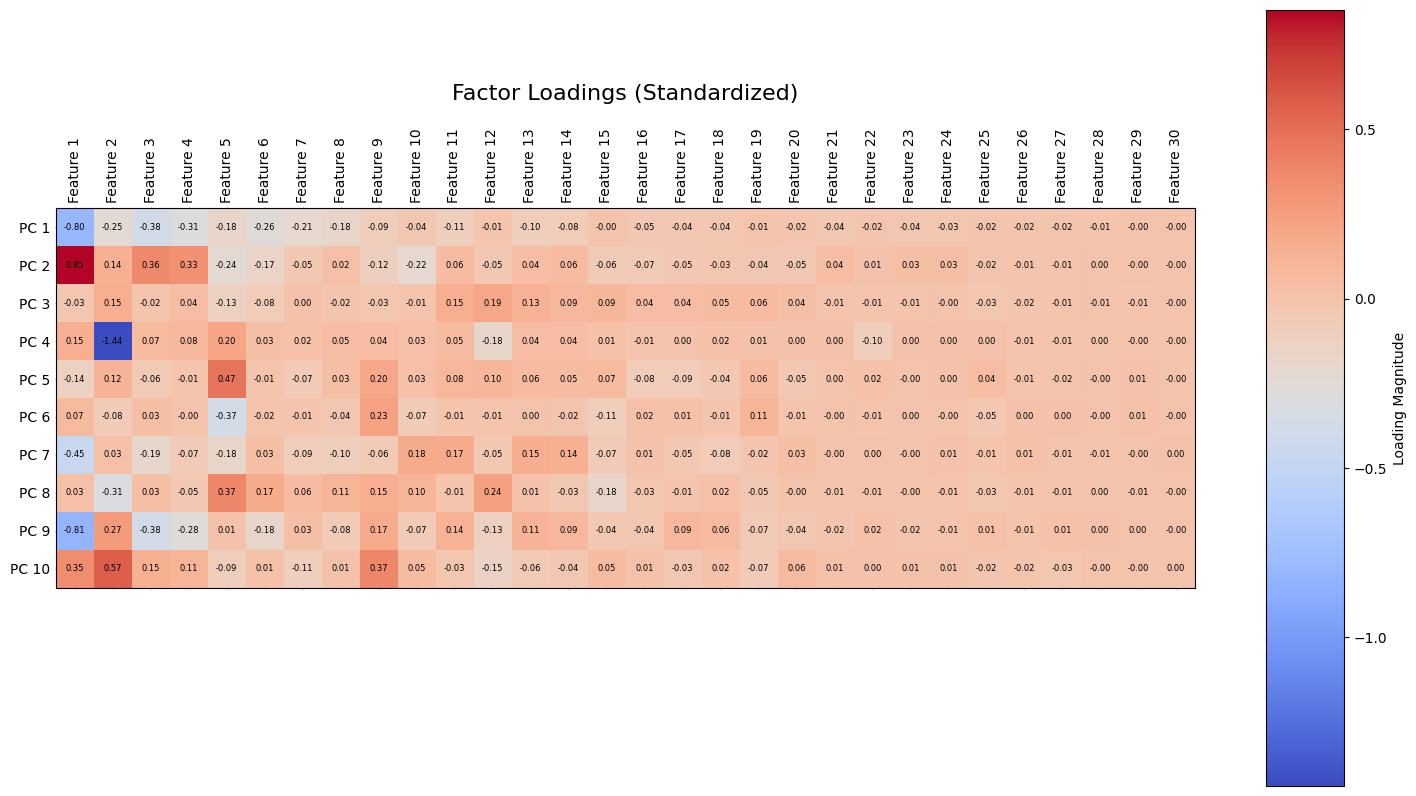

In [ ]:
# Plot Loadings
pca.plot_loadings()

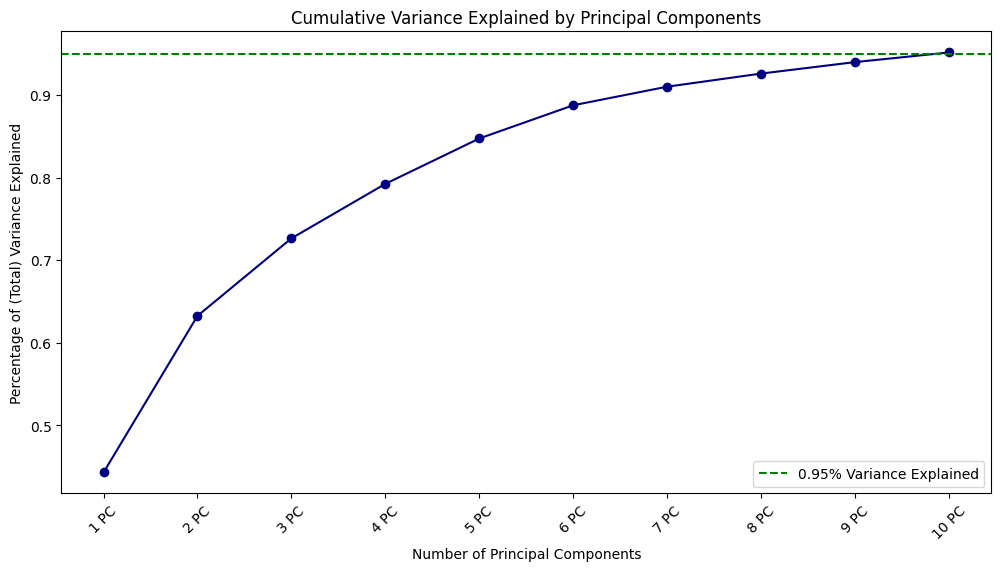

95.0% of the variance is explained using 10 principal components


In [ ]:
# Plot cumulative variance explained by the principal components
pca.plot_total_variance_explained(var_percentage=0.95)

#### Section 2.2: Synthetic Dataset

In [ ]:
def generate_new_datapoints(X, y, n_datapoints, K):

    # Compute mean and covariance of data matrix
    X_mean = np.mean(X, axis=0)
    X_covariance = np.cov(X, rowvar=False)

    # Generate new synthetic datapoints
    new_samples = np.random.multivariate_normal(X_mean, X_covariance, size=n_datapoints)

    # Create labels for the generated datapoints
    nbrs = NearestNeighbors(n_neighbors=K).fit(X)
    distances, indices = nbrs.kneighbors(new_samples)

    new_labels = []
    for neighbor_indices in indices:

        # Get the labels of the 3 nearest neighbors
        neighbor_labels = y.iloc[neighbor_indices]

        # Perform majority voting to find the most common label
        most_common_label = Counter(neighbor_labels).most_common(1)[0][0]
        new_labels.append(most_common_label)

    new_labels = pd.Series(new_labels, dtype=y.dtype)

    new_samples = pd.DataFrame(new_samples, columns=X.columns)
    new_labels = new_labels.reset_index(drop=True)

    return new_samples, new_labels

In [ ]:
# Creating synthetic datapoints
new_samples, new_labels = generate_new_datapoints(X, y, n_datapoints=10500, K=3)

# Creating synthetic dataset (by adding new datapoints to WDBC dataset)
X_synthetic = pd.concat([X, new_samples], ignore_index=True)
y_synthetic = pd.concat([y, new_labels], ignore_index = True)

print("Shape of X_synthetic: ", X_synthetic.shape)
print("Shape of y_synthetic: ", y_synthetic.shape)

# Keep a copy of synthetic data and labels as pandas object
X_synthetic_pandas = X_synthetic
y_synthetic_pandas = y_synthetic
# synthetic_dataset = ...

# Converts the features, labels into numpy arrays
X_synthetic = X_synthetic.to_numpy()
y_synthetic = y_synthetic.map({'M': 1, 'B': 0}).to_numpy()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Shape of X_synthetic:  (11069, 30)
Shape of y_synthetic:  (11069,)


In [ ]:
# Plot the count of class labels (of synthetic dataset)
# label_counts_plot = sns.countplot(x = "diagnosis", palette="Blues", data=y_synthetic_pandas)
# B_synthetic, M_synthetic = y_synthetic_pandas.value_counts()
# print("Number of Benign: ", B_synthetic)
# print("Number of Malignant: ", M_synthetic)

## Section 3: Machine Learning Models

#### Section 3.1: Weighted K-Nearest Neighbors (WKNN)

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class WeightedKNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K #radius
        return

    def fit(self, x, y):
        self.x = x #store the training data using this method as it is a lazy learner
        self.y = y
        self.C = np.max(y) + 1 #number of classes
        return self

    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        n_test = x_test.shape[0]

        #next calculate the distance between every pair of training and test points (why?)
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:]) # n_test x n_train
        y_prob = np.zeros((n_test, self.C)) #keeps the probabilities for each class (ith-row of y_prob has the probability distribution over C classes)
        knns = np.zeros((n_test, self.K), dtype=int) # index of k nearest neighbours to each test point

        epsilon = 1e-10  # small value to avoid numerical issues when distances go to zero

        # Iterates over all test points
        for i in range(n_test):

            # Indices of the K nearest neighbors (training points) to ith test point
            knns[i] = np.argsort(distances[i])[ : self.K]

            # Calculate classification weights (by inverse of distance b/w ith test point and its K nearest neighbors)
            weights = 1 / (distances[i, knns[i]] + epsilon)

            # Iterates over the K nearest neighbors (for ith test point)
            for j in range(self.K):
                index_of_jth_nearest_neighbor = knns[i][j] # index of jth nearest neighbor to ith test point
                jth_neighbor_class = self.y[index_of_jth_nearest_neighbor] # class label of jth nearest neighbor
                y_prob[i, jth_neighbor_class] += weights[j] # add weight to the corresponding class probability

        # Normalize to get probability distribution
        y_prob /= np.sum(y_prob, axis=1, keepdims=True)

        return y_prob, knns

#### Section 3.2: Logistic Regression

In [ ]:
# Sigmoid function: 1 / (1 + exp(-x))
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y


class LogisticRegression:

    def __init__(self, learning_rate=0.01, num_iters=1000):
        """
        Initialize the logistic regression model (with parameters learning rate and number of iterations)

        Parameters:
        - learning_rate (float): The step size for updating weights during gradient descent.
        - num_iters (int): The number of iterations to run gradient descent.
        """
        self.learning_rate = learning_rate
        self.num_iters = num_iters
        self.weights = None
        self.bias = None


    def fit(self, X_train, y_train):
        """
        Fit the logistic regression model using the training data by running gradient descent.

        Parameters:
        X_train (ndarray): The input features for training (shape: (N, D)).
        y_train (ndarray): The target labels for training (shape: (N, 1)).
        """

        N = X_train.shape[0]  # Number of samples in the training set
        D = X_train.shape[1] # Number of features (dimensions)

        # Initialize weights and bias (set to 0)
        self.weights = np.zeros(D)
        self.bias = 0

        # Run gradient descent
        for i in range(self.num_iters):

            # Compute predicted probabilities
            y_linear = np.dot(X_train, self.weights) + self.bias
            y_hat = sigmoid(y_linear)

            # Compute the gradient of the loss with respect to weights (and bias)
            dw = (1 / N) * np.dot(X_train.T, (y_hat - y_train))
            db = (1 / N) * np.sum((y_hat - y_train))

            # Update weights and bias
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

        return


    def predict(self, X_test):
        """
        Predict the labels for the test data.

        Parameters:
        X_test (ndarray): The input features for testing (shape: (N, D)).

        Returns:
        y_hat_classes (list): A list of predicted class labels for each datapoint in X_test (either 0 or 1).
        """

        # Compute class labels
        y_hat = sigmoid(np.dot(X_test, self.weights) + self.bias)
        y_hat_classes = [1 if prob > 0.5 else 0 for prob in y_hat]

        return y_hat_classes


    def compute_accuracy(self, y_hat, y_test):
        """
        Compute the accuracy of the model's predictions by comparing them to the true labels.

        Parameters:
        y_hat (list): A list of predicted class labels.
        y_test (ndarray): A list of true class labels.

        Returns:
        acc (float): The accuracy of the model's predictions.
        """

        # Calculate accuracy by comparing predicted labels with true labels
        acc = np.sum(y_hat == y_test) / len(y_test)

        return acc

#### Section 3.3: Convolutional Neural Network (CNN)

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=2)
        self.bn1 = nn.BatchNorm2d(16)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=2)
        self.bn2 = nn.BatchNorm2d(32)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=2)
        self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 128, kernel_size=2)
        self.bn4 = nn.BatchNorm2d(128)

        # Convolutional block 5
        self.conv5 = nn.Conv2d(128, 256, kernel_size=2, padding=1)
        self.bn5 = nn.BatchNorm2d(256)

        self.avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)

        # Assuming the input images are 64x64 pixels
        self.linear1 = nn.Linear(256, 128)
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 2)  # Output layer for 2 classes


    def forward(self, x):
        x = x.type(torch.float32)
        x = self.avg_pool(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout1(x)
        x = self.avg_pool(F.relu(self.bn2(self.conv2(x))))
        x = self.avg_pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout2(x)
        x = self.avg_pool(F.relu(self.bn4(self.conv4(x))))
        x = self.dropout3(x)
        x = self.avg_pool(F.relu(self.bn5(self.conv5(x))))

        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

## Section 4: Model Training & Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Creating training and testing set using WDBC dataset
X = X.to_numpy()
y = y.map({'M': 1, 'B': 0}).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Creating training and testing set using synthetic dataset
X_synthetic_train, X_synthetic_test, y_synthetic_train, y_synthetic_test = train_test_split(X_synthetic, y_synthetic, test_size=0.3, random_state=1234)

#### Section 4.1: Weighted K-Nearest Neighbors (WKNN)

In [ ]:
# Training & Testing (on WDBC dataset)

best_acc_WDBC = 0
best_k_WDBC = 0

# Hyperparameter tuning (determining K value that gives the highest accuracy)
for K in range(1, 21):

    # Creates model
    model = WeightedKNN(K)

    y_prob, knns = model.fit(X_train, y_train).predict(X_test)
    y_pred = np.argmax(y_prob, axis=-1)
    accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

    if accuracy > best_acc_WDBC:
        best_acc_WDBC = accuracy
        best_k_WDBC = K

    # Prints accuracy achieved using current K
    print(f'Accuracy = {accuracy} (using K = {K})')

# Print test accuracy (using optimal K value)
print(f'Best validation accuracy is {best_acc_WDBC*100}%, using k={best_k_WDBC}')

Accuracy = 0.9181286549707602 (using K = 1)
Accuracy = 0.9181286549707602 (using K = 2)
Accuracy = 0.9298245614035088 (using K = 3)
Accuracy = 0.935672514619883 (using K = 4)
Accuracy = 0.9239766081871345 (using K = 5)
Accuracy = 0.9532163742690059 (using K = 6)
Accuracy = 0.9415204678362573 (using K = 7)
Accuracy = 0.9532163742690059 (using K = 8)
Accuracy = 0.9415204678362573 (using K = 9)
Accuracy = 0.9473684210526315 (using K = 10)
Accuracy = 0.9415204678362573 (using K = 11)
Accuracy = 0.9415204678362573 (using K = 12)
Accuracy = 0.935672514619883 (using K = 13)
Accuracy = 0.9415204678362573 (using K = 14)
Accuracy = 0.9239766081871345 (using K = 15)
Accuracy = 0.935672514619883 (using K = 16)
Accuracy = 0.9239766081871345 (using K = 17)
Accuracy = 0.9239766081871345 (using K = 18)
Accuracy = 0.9239766081871345 (using K = 19)
Accuracy = 0.9298245614035088 (using K = 20)
Best validation accuracy is 95.32163742690058%, using k=6


In [ ]:
# Training & Testing (on synthetic dataset)

best_acc_synthetic = 0
best_k_synthetic = 0

# Hyperparameter tuning (determining K value that gives the highest accuracy)
for K in range(1, 21):

    # Creates model
    model = WeightedKNN(K)

    y_prob, knns = model.fit(X_synthetic_train, y_synthetic_train).predict(X_synthetic_test)
    y_pred = np.argmax(y_prob, axis=-1)
    accuracy = np.sum(y_pred == y_synthetic_test) / y_synthetic_test.shape[0]

    if accuracy > best_acc_synthetic:
        best_acc_synthetic = accuracy
        best_k_synthetic = K

    # Prints accuracy achieved using current K
    print(f'Accuracy = {accuracy} (using K = {K})')

# Print test accuracy (using optimal K value)
print(f'Best validation accuracy is {best_acc_synthetic*100}%, using k={best_k_synthetic}')

Accuracy = 0.9777175549533274 (using K = 1)
Accuracy = 0.9777175549533274 (using K = 2)
Accuracy = 0.9789220114423366 (using K = 3)
Accuracy = 0.9798253538090936 (using K = 4)
Accuracy = 0.98193315266486 (using K = 5)
Accuracy = 0.9822342667871123 (using K = 6)
Accuracy = 0.9831376091538693 (using K = 7)
Accuracy = 0.98193315266486 (using K = 8)
Accuracy = 0.982836495031617 (using K = 9)
Accuracy = 0.9831376091538693 (using K = 10)
Accuracy = 0.981029810298103 (using K = 11)
Accuracy = 0.9831376091538693 (using K = 12)
Accuracy = 0.98193315266486 (using K = 13)
Accuracy = 0.9825353809093647 (using K = 14)
Accuracy = 0.9831376091538693 (using K = 15)
Accuracy = 0.982836495031617 (using K = 16)
Accuracy = 0.982836495031617 (using K = 17)
Accuracy = 0.9822342667871123 (using K = 18)
Accuracy = 0.982836495031617 (using K = 19)
Accuracy = 0.983739837398374 (using K = 20)
Best validation accuracy is 98.3739837398374%, using k=20


#### Section 4.2: Logistic Regression

In [ ]:
# Create Logistic Regression model
logisticRegression_WDBC = LogisticRegression(learning_rate=0.01, num_iters=700)
logisticRegression_synthetic = LogisticRegression(learning_rate=0.01, num_iters=700)

In [ ]:
# Training (on WDBC dataset)
logisticRegression_WDBC.fit(X_train, y_train)
logisticRegression_WDBC_y_hat_train = logisticRegression_WDBC.predict(X_train)
logisticRegression_WDBC_acc_train = logisticRegression_WDBC.compute_accuracy(logisticRegression_WDBC_y_hat_train, y_train)
print(f'(Training) accuracy of the Logistic Regression model: {logisticRegression_WDBC_acc_train * 100}%')

# Testing (on WDBC dataset)
logisticRegression_WDBC_y_hat_test = logisticRegression_WDBC.predict(X_test)
logisticRegression_WDBC_acc = logisticRegression_WDBC.compute_accuracy(logisticRegression_WDBC_y_hat_test, y_test)
print(f'(Testing) accuracy of the Logistic Regression model: {logisticRegression_WDBC_acc * 100}%')

(Training) accuracy of the Logistic Regression model: 91.4572864321608%
(Testing) accuracy of the Logistic Regression model: 87.71929824561403%


/var/folders/x9/dr5nnxp55fv46zrz3bq1wgc00000gn/T/ipykernel_68060/3447003553.py:3: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


In [ ]:
# Training (on synthetic dataset)
logisticRegression_synthetic.fit(X_synthetic_train, y_synthetic_train)
logisticRegression_synthetic_y_hat_train = logisticRegression_synthetic.predict(X_synthetic_train)
logisticRegression_synthetic_acc_train = logisticRegression_synthetic.compute_accuracy(logisticRegression_synthetic_y_hat_train, y_synthetic_train)
print(f'(Training) accuracy of the Logistic Regression model: {logisticRegression_synthetic_acc_train * 100}%')

# Testing (on synthetic dataset)
logisticRegression_synthetic_y_hat_test = logisticRegression_synthetic.predict(X_synthetic_test)
logisticRegression_synthetic_acc_test = logisticRegression_synthetic.compute_accuracy(logisticRegression_synthetic_y_hat_test, y_synthetic_test)
print(f'(Testing) accuracy of the Logistic Regression model: {logisticRegression_synthetic_acc_test * 100}%')

(Training) accuracy of the Logistic Regression model: 85.7769747031492%
(Testing) accuracy of the Logistic Regression model: 84.31195423065341%


/var/folders/x9/dr5nnxp55fv46zrz3bq1wgc00000gn/T/ipykernel_68060/3447003553.py:3: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


#### Section 4.3: Decision Tree (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
decisionTree_WDBC = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=1234)
decisionTree_synthetic = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=1234)

In [ ]:
# Training (on WDBC dataset)
decisionTree_WDBC.fit(X_train, y_train)
decisionTree_WDBC_y_hat_train = decisionTree_WDBC.predict(X_train)
print(f'(Training) accuracy of the Decision Tree model: {accuracy_score(decisionTree_WDBC_y_hat_train, y_train) * 100}%')


# Testing (on WDBC dataset)
decisionTree_WDBC_y_hat_test = decisionTree_WDBC.predict(X_test)
print(f'(Testing) accuracy of the Decision Tree model: {accuracy_score(decisionTree_WDBC_y_hat_test, y_test) * 100}%')

(Training) accuracy of the Decision Tree model: 99.2462311557789%
(Testing) accuracy of the Decision Tree model: 95.32163742690058%


In [ ]:
# Training (on synthetic dataset)
decisionTree_synthetic.fit(X_synthetic_train, y_synthetic_train)
decisionTree_synthetic_y_hat_train = decisionTree_synthetic.predict(X_synthetic_train)
print(f'(Training) accuracy of the Decision Tree model: {accuracy_score(decisionTree_synthetic_y_hat_train, y_synthetic_train) * 100}%')

# Testing (on synthetic dataset)
decisionTree_synthetic_y_hat_test = decisionTree_synthetic.predict(X_synthetic_test)
print(f'(Testing) accuracy of the Decision Tree model: {accuracy_score(decisionTree_synthetic_y_hat_test, y_synthetic_test) * 100}%')


(Training) accuracy of the Decision Tree model: 97.05730511099638%
(Testing) accuracy of the Decision Tree model: 96.50707618187293%


#### Section 4.4: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
randomForest_WDBC = RandomForestClassifier()
randomForest_synthetic = RandomForestClassifier()

In [ ]:
# Training (on WDBC dataset)
randomForest_WDBC.fit(X_train, y_train)
randomForest_WDBC_y_hat_train = randomForest_WDBC.predict(X_train)
print(f'(Training) accuracy of the Random Forest model: {accuracy_score(randomForest_WDBC_y_hat_train, y_train) * 100}%')


# Testing (on WDBC dataset)
randomForest_WDBC_y_hat_test = randomForest_WDBC.predict(X_test)
print(f'(Testing) accuracy of the Random Forest model: {accuracy_score(randomForest_WDBC_y_hat_test, y_test) * 100}%')

(Training) accuracy of the Random Forest model: 100.0%
(Testing) accuracy of the Random Forest model: 92.39766081871345%


In [ ]:
# Training (on synthetic dataset)
randomForest_synthetic.fit(X_synthetic_train, y_synthetic_train)
randomForest_synthetic_y_hat_train = randomForest_synthetic.predict(X_synthetic_train)
print(f'(Training) accuracy of the Random Forest model: {accuracy_score(randomForest_synthetic_y_hat_train, y_synthetic_train) * 100}%')


# Testing (on synthetic dataset)
randomForest_synthetic_y_hat_test = randomForest_synthetic.predict(X_synthetic_test)
print(f'(Testing) accuracy of the Random Forest model: {accuracy_score(randomForest_synthetic_y_hat_test, y_synthetic_test) * 100}%')

(Training) accuracy of the Random Forest model: 100.0%
(Testing) accuracy of the Random Forest model: 96.14573923517013%


#### Section 4.5: Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Create SVM model
svm_classifier_WDBC = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
svm_classifier_synthetic = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.

In [ ]:
# Training (on WDBC dataset)
svm_classifier_WDBC.fit(X_train, y_train)
y_pred_WDBC_train = svm_classifier_WDBC.predict(X_train)
print(f'(Training) accuracy of the SVM model: {accuracy_score(y_pred_WDBC_train, y_train) * 100}%')


# Testing (on WDBC dataset)
y_pred_WDBC_test = svm_classifier_WDBC.predict(X_test)
print(f'(Testing) accuracy of the SVM model: {accuracy_score(y_pred_WDBC_test, y_test) * 100}%')

(Training) accuracy of the SVM model: 97.48743718592965%
(Testing) accuracy of the SVM model: 93.56725146198829%


In [ ]:
# Training (on synthetic dataset)
svm_classifier_synthetic.fit(X_synthetic_train, y_synthetic_train)
y_pred_synthetic_train = svm_classifier_synthetic.predict(X_synthetic_train)
print(f'(Training) accuracy of the SVM model: {accuracy_score(y_pred_synthetic_train, y_synthetic_train) * 100}%')


# Testing (on synthetic dataset)
y_pred_synthetic_test = svm_classifier_synthetic.predict(X_synthetic_test)
print(f'(Testing) accuracy of the SVM model: {accuracy_score(y_pred_synthetic_test, y_synthetic_test) * 100}%')

(Training) accuracy of the SVM model: 94.07589055240062%
(Testing) accuracy of the SVM model: 94.1282746160795%


#### Section 4.6: Convolutional Neural Network (CNN)

In [ ]:
# Convert Numerical Data to Image
import itertools

# Shuffle the feature_names
feature_names = X_synthetic_pandas.columns.tolist()
np.random.shuffle(feature_names)

rows = 6
cols = 5

correlation_matrix = X_synthetic_pandas.corr()

def calculate_correlation_sum(grid, correlation_matrix):
    total_correlation = 0
    rows, cols = grid.shape
    for i in range(rows):
        for j in range(cols):
            # Check the right neighbor
            if j + 1 < cols:  # If not at the right edge
                total_correlation += correlation_matrix.loc[grid[i, j], grid[i, j + 1]]
            # Check the bottom neighbor
            if i + 1 < rows:  # If not at the bottom edge
                total_correlation += correlation_matrix.loc[grid[i, j], grid[i + 1, j]]
            # Check the left neighbor
            if j - 1 >= 0:  # If not at the left edge
                total_correlation += correlation_matrix.loc[grid[i, j], grid[i, j - 1]]
            # Check the top neighbor
            if i - 1 >= 0:  # If not at the top edge
                total_correlation += correlation_matrix.loc[grid[i, j], grid[i - 1, j]]
    return total_correlation


def find_best_image(feature_names):

    grid = np.array(feature_names).reshape(rows, cols) # Reshape into a 2D matrix

    # Optimize the arrangement
    best_grid = grid.copy()
    best_score = calculate_correlation_sum(grid, correlation_matrix)

    # Swap features to find a better arrangement
    for _ in range(10000):  # Number of iterations

        # Randomly swap two features
        i1, i2 = np.random.randint(0, rows), np.random.randint(0, cols)
        j1, j2 = np.random.randint(0, rows), np.random.randint(0, cols)
        grid[i1, i2], grid[j1, j2] = grid[j1, j2], grid[i1, i2]

        # Calculate the new score
        new_score = calculate_correlation_sum(grid, correlation_matrix)
        if new_score > best_score:
            best_score = new_score
            best_grid = grid.copy()
        else:
            # Revert the swap if no improvement
            grid[i1, i2], grid[j1, j2] = grid[j1, j2], grid[i1, i2]

    return best_grid


def map_feature_values(x, feature_name_matrix, patient_number):

    # Get the feature values for the specified patient row
    patient_values = X_synthetic_pandas.iloc[patient_number]

    # Initialize a matrix to hold the mapped numerical values
    value_matrix = np.zeros_like(feature_name_matrix, dtype=float)

    # Replace feature names with corresponding numerical values
    for i in range(feature_name_matrix.shape[0]):
        for j in range(feature_name_matrix.shape[1]):
            feature_name = feature_name_matrix[i, j]
            value_matrix[i, j] = patient_values[feature_name]

    return value_matrix


# Function that maps to the image that has the highest entropy
best_image = find_best_image(feature_names)

In [ ]:
patient_images = []

for i in range(X_synthetic_pandas.shape[0]):
    img = map_feature_values(X_synthetic_pandas,best_image,i)
    process_img = (img - img.min()) / (img.max() - img.min())
    process_img = cv2.resize(process_img, (32, 32), interpolation=cv2.INTER_LINEAR)
    process_img = np.expand_dims(process_img, axis=0)
    patient_images.append(process_img)

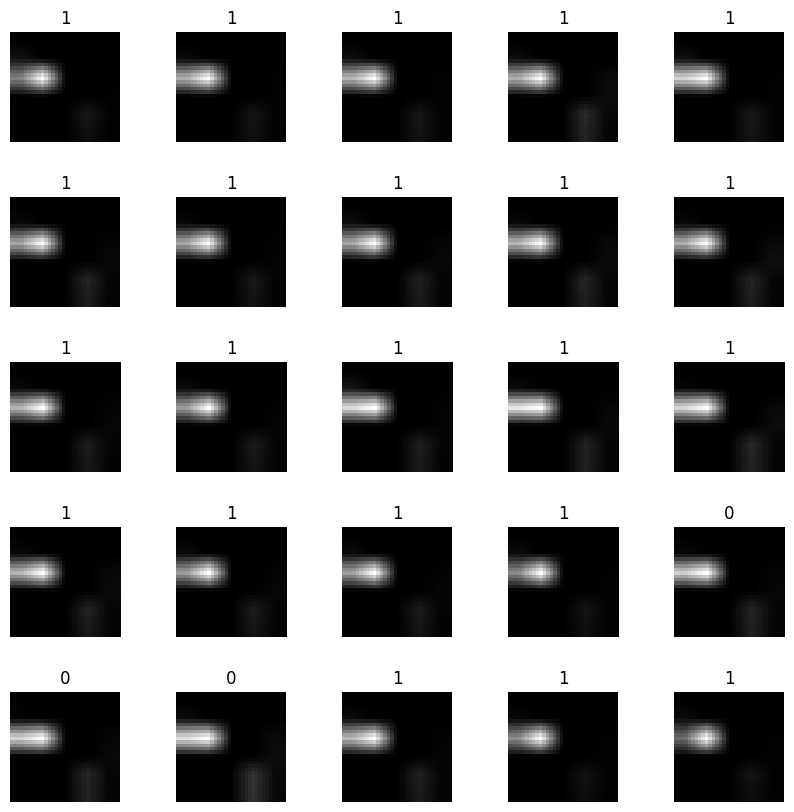

In [ ]:
def plot_data(x, y):
    x = np.squeeze(x)
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # 5x5 grid
    fig.subplots_adjust(hspace=0.5, wspace=0.5)       # Space between images

    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i], cmap='gray')
        ax.set_title(str(y[i]))
        ax.axis('off')  # Remove axes

    plt.show()

# Displays the images for the first 25 class labels in the WDBC dataset
plot_data(patient_images, y_synthetic)

In [ ]:
def process_data(patient_images, labels, batch_size):

    x_train_img, x_test_img, y_train_img, y_test_img = train_test_split(patient_images, labels, test_size=0.3, random_state=42)

    x_train_img = torch.tensor(x_train_img, dtype=torch.float32)
    y_train_img = torch.tensor(y_train_img, dtype=torch.long)

    # X_val = tf.convert_to_tensor(X_val, dtype=tf.float32)
    # y_val = tf.convert_to_tensor(y_val, dtype=tf.int32)

    x_test_img = torch.tensor(x_test_img, dtype=torch.float32)
    y_test_img = torch.tensor(y_test_img, dtype=torch.long)

    # Create DataLoader for batching
    train_loader = DataLoader(TensorDataset(x_train_img, y_train_img), batch_size=batch_size, shuffle=True)
    # val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32, shuffle=False)
    test_loader = DataLoader(TensorDataset(x_test_img, y_test_img), batch_size=batch_size, shuffle=False)

    return train_loader,test_loader

In [ ]:
# Create CNN model
CNN_WDBC = CNN()
CNN_synthetic = CNN()

# Define the required parameters
learning_rate = 0.002
momentum = 0.9
weight_decay = 0.001
num_epochs = 50
batch_size = 32

# Define optimizers
criterion = nn.CrossEntropyLoss(reduction='mean')

optimizer_WDBC = optim.SGD(CNN_WDBC.parameters(), lr=learning_rate, momentum=momentum)
scheduler_WDBC = ReduceLROnPlateau(optimizer_WDBC, mode='min', factor=0.9, patience=5, verbose=True) # Learning Rate adjustment with patience
optimizer_synthetic = optim.SGD(CNN_synthetic.parameters(), lr=learning_rate, momentum=momentum)
scheduler_synthetic = ReduceLROnPlateau(optimizer_synthetic, mode='min', factor=0.9, patience=5, verbose=True) # Learning Rate adjustment with patience

In [ ]:
# Training loop (for WDBC dataset)

train_loss = []
train_acc = []

train_dataset_WDBC, test_dataset_WDBC = process_data(patient_images, y_synthetic, batch_size)

CNN_WDBC.train()
for epoch in range(num_epochs):

    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(train_dataset_WDBC,0):

      inputs, label = data
      optimizer_WDBC.zero_grad()
      outputs = CNN_WDBC(inputs)

      # process the labels for the loss function
      # labels_processed = process_label(labels)
      # labels = labels - 1
      loss = criterion(outputs, label)
      loss.backward()
      optimizer_WDBC.step()


      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total += label.size(0)
      correct += (predicted == label).sum().item()


    avg_train_loss = running_loss / len(train_dataset_WDBC)
    train_accuracy = 100 * correct / total
    train_loss.append(avg_train_loss)
    train_acc.append(train_accuracy)

    scheduler_WDBC.step(avg_train_loss)

    print(f'Current learning rate is: {optimizer_WDBC.param_groups[0]["lr"]}')
    print(f'Epoch {epoch} - Training loss : {avg_train_loss:.3f} | Training accuracy : {train_accuracy:.2f}%')


    # Threshold to stop training
    if (avg_train_loss < 0.01):
      break

    CNN_WDBC.train()

print('finihsed training')

/var/folders/x9/dr5nnxp55fv46zrz3bq1wgc00000gn/T/ipykernel_68060/1612497517.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  x_train_img = torch.tensor(x_train_img, dtype=torch.float32)


Current learning rate is: 0.002
Epoch 0 - Training loss : 0.622 | Training accuracy : 66.56%
Current learning rate is: 0.002
Epoch 1 - Training loss : 0.410 | Training accuracy : 82.05%
Current learning rate is: 0.002
Epoch 2 - Training loss : 0.308 | Training accuracy : 87.31%
Current learning rate is: 0.002
Epoch 3 - Training loss : 0.292 | Training accuracy : 88.02%
Current learning rate is: 0.002
Epoch 4 - Training loss : 0.283 | Training accuracy : 88.66%
Current learning rate is: 0.002
Epoch 5 - Training loss : 0.274 | Training accuracy : 88.55%
Current learning rate is: 0.002
Epoch 6 - Training loss : 0.267 | Training accuracy : 88.96%
Current learning rate is: 0.002
Epoch 7 - Training loss : 0.252 | Training accuracy : 89.53%
Current learning rate is: 0.002
Epoch 8 - Training loss : 0.253 | Training accuracy : 89.33%
Current learning rate is: 0.002
Epoch 9 - Training loss : 0.249 | Training accuracy : 89.18%
Current learning rate is: 0.002
Epoch 10 - Training loss : 0.249 | Tra

In [ ]:
# Testing (for WDBC dataset)

CNN_WDBC.eval()

correct = 0
total = 0
# Deactivate autograd for evaluation
with torch.no_grad():

    for data in test_dataset_WDBC:
        images, label = data
        outputs = CNN_WDBC(images)  # Compute model output
        _, predicted = torch.max(outputs.data, 1)
        total += label.size(0)
        correct += (predicted == label).sum().item()

print(correct)

# Calculate and print the accuracy
accuracy = 100 * correct / total

print("Test Accuracy is", accuracy, "%")

2834
Test Accuracy is 85.33574224631136 %
